<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1
#### Nicolás Sewrjugin


# Introducción
En este trabajo, se continuará trabajando con distintos tipos de señales. Sin embargo, se añadirán nuevos conceptos a destacar, como la modulación en amplitud, la potencia, la autocorrelación y la ortogonalidad  con las siguientes señales:

   - Una señal sinusoidal de 2KHz.
   - Misma señal amplificada y desfasada en π/2.
   - Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
   - Señal anterior recortada al 75% de su potencia.
   - Una señal cuadrada de 4KHz.
   - Un pulso rectangular de 10ms.
   - En cada caso indique tiempo entre muestras, número de muestras y potencia.

En cuanto al análisis de la ortogonalidad, se debe tener en cuenta el producto interno entre las dos funciones requeridas, pudiéndose traducir a una integral y teniendo que valer esta última *0*. Este concepto es importante, ya que la ortogonalidad brinda la certeza de que ambas señales no comparten información y que, por ejemplo, se pueda extraer una señal sin que la otra interfiera (sobre todo, el ruido):
\begin{equation}
\int_a^b f(t) \cdot g(t) \, dt = 0
\end{equation}

Para el caso de la autocorrelacción, con esta magnitud se busca medir la similitud de una señal consigo misma a diferentes retardos o desplazamientos temporales. A través de la demora nula, se puede obtener fácilmente la energía total de la señal :
\begin{equation}
r_{xx} (n)=\sum_{n=0}^{N-1} x(n)x(n+m)
\end{equation}

Por último, cabe mencionar a la energía que, en una señal discreta $x[n]$, se calcula de forma diferente:

\begin{equation}
E_x = \sum_{n=-\infty}^{\infty} |x[n]|^2
\end{equation}

Si la señal es de duración finita, se analiza en una ventana de $N$ muestras. También, si se busca obtener la energía en el espectro continuo, basta con mutltiplicar por el período de muestreo *Ts*:

\begin{equation}
E_c = \sum_{n=0}^{N-1} |x[n]|^2 \cdot Ts
\end{equation}

Esta indica que, cuantas más muestras se incluyan en la suma, mayor será la energía acumulada. Por otro lado, si se utiliza una ventana más corta de tiempo/muestras, se capturará menos energía.


# Análisis y desarrollo
Antes de exponer el código, cabe destacar la siguiente ecuación:
\begin{equation}
x(t)=Asen(2\pi ft + \phi)
\end{equation}
Siendo *A* la amplitud y $\phi$ el desfase, variando estos valores se puede cambiar a la señal. Por lo tanto, para la modulación en amplitud, no es más que multipicar a la función por otra requerida, transformándose así el valor de *A* en uno nuevo (cuyo valor será el producto entre la amplitud anterior y la función solicitada).
En este mismo sentido, se puede presentar ahora que la potencia, para una función senoidal, es la siguiente:
\begin{equation}
Potencia=\frac{A^{2}}{2}
\end{equation}
Por lo tanto, para recortar a una función al 75% de su potencia, se calcula la potencia con esta ecuación y, luego, se obtiene el 75% de ella (multiplicando por *0.75*). Para conseguir la nueva amplitud que tendrá la señal recortada, se debería despejar la *A* en la ecuación (ya teniendo el valor de la potencia al 75%).

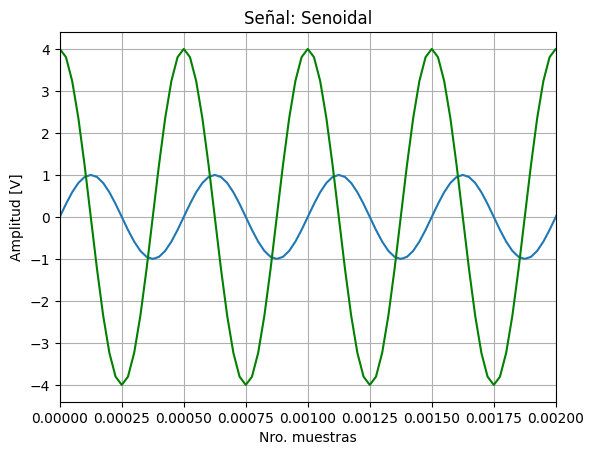

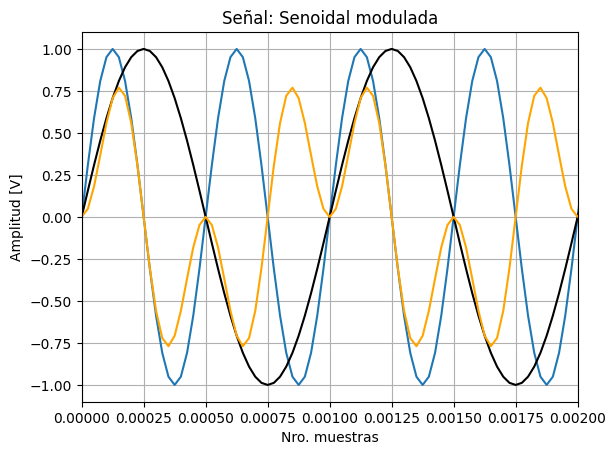

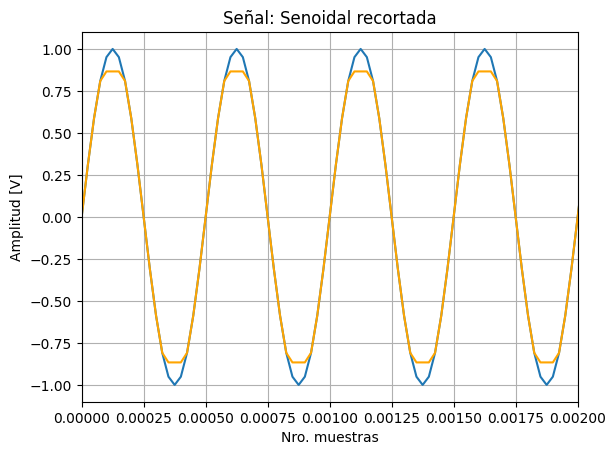


 Energía de Senoidal:  500.0

 Energía de Amplificada:  7999.999999999998

 Energía de Modulada:  250.00000000000009

 Energía de Recortada:  444.0983005625053


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Datos generales de la simulación
def mi_funcion_sen( vmax, dc, ff, ph, nn, fs): 
    
    ts = 1/fs # resolución espectral
    
    tt = np.linspace(0, nn*ts, nn, endpoint=False) # empieza en 0, va hasta 1/df=N*ts y teniendo N muestras para el paso (el endpoint en False hace que no incluya el valor final)
    
    xx = vmax*np.sin(2*np.pi*ff*tt+ph)+dc 
    
    return tt,xx

N = 1000  # cantidad de muestras para todas
fs= 40000 # por Nyquist, como la f que necesitamos es de 2kHz, la fs deberá ser mayor que 4kHz

t,x = mi_funcion_sen(1, 0, 2000, 0, N, fs) # funcion senoidal de 2kHz

t1,x1 = mi_funcion_sen(4, 0, 2000, np.pi/2, N, fs) #señal amplificada por 4 y desfasada pi/2

#  Presentación gráfica de los resultados
plt.figure(1)
plt.plot(t, x)
plt.plot(t1, x1, color='green') #amplificada
plt.title('Señal: Senoidal' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.xlim(0, 0.002) #para ver con mejor zoom el grafico directamente
plt.show()

#Señal modulada
t2,x2 = mi_funcion_sen(1, 0, 1000, 0, N, fs) #funcion senoidal de la mitad de la frecuencia de 2kHz (1kHz)

t3,x3 = t2, x*x2 #señal modulada de 2kHz en amplitud por la de 1kHz

plt.figure(2)
plt.plot(t, x)
plt.plot(t2, x2, color='black') #funcion senoidal de la mitad de la frecuencia
plt.plot(t3, x3, color='orange') #funcion modulada
plt.title('Señal: Senoidal modulada' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.xlim(0, 0.002)
plt.show

#Señal recortada
potencia = np.mean(x**2) #obtengo la potencia de la señal de 2kHz
pot75 = potencia*0.75 #calculo el 75% de esa señal 
amp=np.sqrt(pot75*2) # obtengo la amplitud correspondiente a ese valor de potencia al 75% con la ecuación A=raiz cuadrada(potencia*2)

x4 = np.clip(x, -amp, amp) #logro recortar en esa amplitud conseguida a la señal de 2kHz 

plt.figure(3)
plt.plot(t, x)
plt.plot(t, x4, color='orange') #señal recortada en potencia al 75%
plt.title('Señal: Senoidal recortada' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.xlim(0, 0.002)
plt.show()

x_lista = [x, x1, x3, x4]  # tus señales del TS1
nombres = ['Senoidal', 'Amplificada', 'Modulada', 'Recortada']

for i, x_señal in enumerate(x_lista):
    energia = np.sum(np.abs(x_señal)**2)

    print(f"\n Energía de {nombres[i]}: ", energia) #adimensional
    

### Señal cuadrada y pulso rectangular
Una señal cuadrada es una función de onda periódica que alterna entre dos niveles de forma abrupta, de igual estadía en cada uno.
Para el caso del pulso rectangular, puede ser uno solo (no repetirse) y permanecer en cada nivel sin discriminación alguna. Para elaborar esto en el código, se estalece una matriz de ceros del tamaño requerido. Posteriormente, en los valores que se quiere que "viva" el pulso, se varía su valor a *1*. De esta manera, se obtendrá una función que es nula en todos los puntos, menos en los valores que dura el pulso.

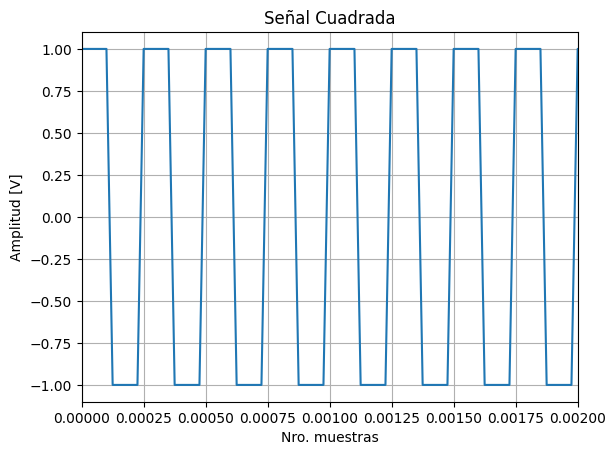

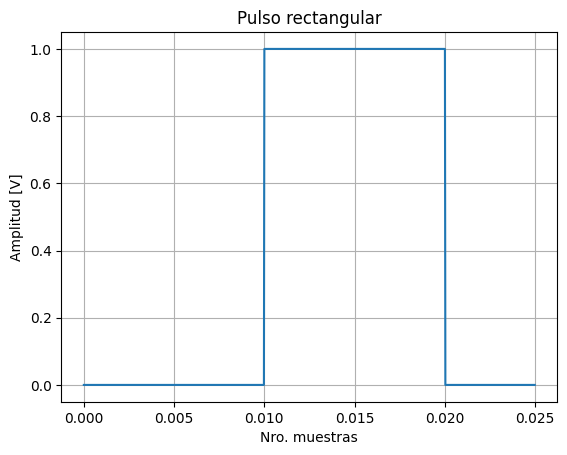


 Energía de Cuadrada:  1000.0

 Energía de Pulso Rectangular:  401.0


In [3]:
#Funcion cuadrada 
x5 = signal.square(2*np.pi*4000*t) #señal cuadrada de 4kHz

plt.figure(4)
plt.plot(t, x5)
plt.title('Señal Cuadrada' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.xlim(0, 0.002)
plt.show()

#Pulso rectangular
t_start = 0.01
t_end = 0.02 
#entre t_start y t_end hay 10ms

x6 = np.zeros_like(t) #crea un array de ceros del mismo tamaño que t
x6[(t >= t_start) & (t <= t_end)] = 1 #seleccionamos los valores de x6 que están entre t_start y t_end y los convertimos en 1

plt.figure(5)
plt.plot(t, x6)
plt.title('Pulso rectangular' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
plt.show()

energia2 = np.sum(np.abs(x5)**2)

print(f"\n Energía de Cuadrada: ", energia2) #adimensional

energia3 = np.sum(np.abs(x6)**2)

print(f"\n Energía de Pulso Rectangular: ", energia3) #adimensional

### Ortogonalidad de las funciones
Para analizar la ortogonalidad de las funciones, se posee la fórmula detallada en la *Introducción*. Sin embargo, en este trabajo, se están utilizando señales de dominio discreto, lo cual se traduce en los siguiente:
\begin{equation}
\langle x, y \rangle = \sum_{n=0}^{N-1} x[n] \, y[n] = 0
\end{equation}
Igualmente, para obtenerlo de manera integral, bastaría con hacer el producto interno punto a punto entre mis funciones, multiplicando por el paso *dt*.

In [6]:
#Ortogonalidad
integral = np.dot(x, x1) * (t[1]-t[0]) # hace el producto interno punto a punto, con el paso como t[1]-t[0]=dt
print("Integral (producto punto) entre la señal de 2kHz y su amplificada con desfase:", integral)
if np.isclose(integral, 0, atol=1e-3): #compara el valor de la integral con 0 y con una tolerancia de 1e-3, un valor superior al error que se esperaría
    print("Las señales son ortogonales")
else:
    print("Las señales NO son ortogonales")

integral1 = np.dot(x, x3) * (t[1]-t[0]) 
print("Integral (producto punto) entre la señal de 2kHz y la modulada en amplitud:", integral1)
if np.isclose(integral1, 0, atol=1e-3):
    print("Las señales son ortogonales")
else:
    print("Las señales NO son ortogonales")
    
integral2 = np.dot(x, x4) * (t[1]-t[0]) 
print("Integral (producto punto) entre la señal de 2kHz y la recortada en potencia:", integral2)
if np.isclose(integral2, 0, atol=1e-3): 
    print("Las señales son ortogonales")
else:
    print("Las señales NO son ortogonales") #no es ortogonal porque ya no es un seno, no tiene la misma forma de onda
    
integral3 = np.dot(x, x5) * (t[1]-t[0]) 
print("Integral (producto punto) entre la señal de 2kHz y la señal cuadrada de 4kHz:", integral3)
if np.isclose(integral3, 0, atol=1e-3): 
    print("Las señales son ortogonales") #son ortogonales porque no comparten la misma frecuencia
else:
    print("Las señales NO son ortogonales")
    
integral4 = np.dot(x, x6) * (t[1]-t[0]) 
print("Integral (producto punto) entre la señal de 2kHz y el pulso rectangular de 10ms:", integral4)
if np.isclose(integral4, 0, atol=1e-3): 
    print("Las señales son ortogonales") #son ortogonales porque el pulso abarca un número entero de períodos del seno (0.5ms)
else:
    print("Las señales NO son ortogonales")
    

Integral (producto punto) entre la señal de 2kHz y su amplificada con desfase: 1.894429058069136e-16
Las señales son ortogonales
Integral (producto punto) entre la señal de 2kHz y la modulada en amplitud: -2.7087707077377845e-19
Las señales son ortogonales
Integral (producto punto) entre la señal de 2kHz y la recortada en potencia: 0.011760716541255387
Las señales NO son ortogonales
Integral (producto punto) entre la señal de 2kHz y la señal cuadrada de 4kHz: -0.0006500000000000088
Las señales son ortogonales
Integral (producto punto) entre la señal de 2kHz y el pulso rectangular de 10ms: -8.149122037550142e-19
Las señales son ortogonales


### Autocorrelación y correlación
Ya habiendo explicado el concepto de la autocorrelación, la correlación cruzada no es más que medir cuán parecida es una función con otra, con respecto a una demora temporal. Se puede apreciar cómo va cambiando esta relación a medida que se va desplazando la funcion en cuestión:
\begin{equation}
r_{xy} (n)=\sum_{n=0}^{N} x(n)y(n+m)
\end{equation}
Cabe destacar que, la correlación cruzada, guarda cierta semejanza con la ortogonalidad. Si se considera una demora nula, basta con pedir que *$r_{xy}$=0* para demostrar la ortogonalidad entre *x* e *y* (*$r_{xy}$(0)=0*), es decir, correlacion nula.

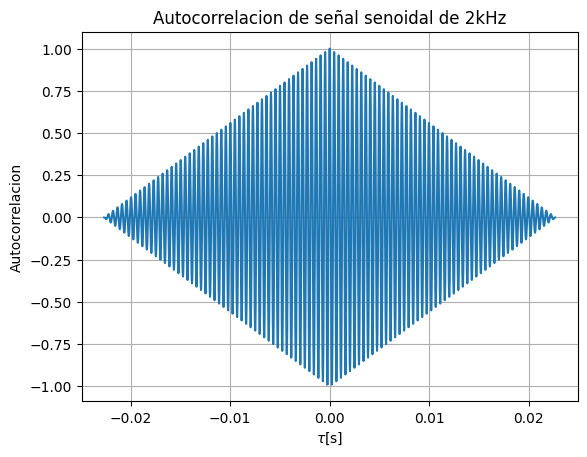

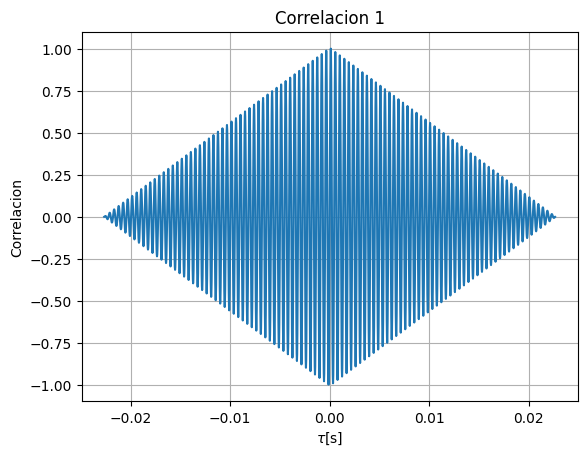

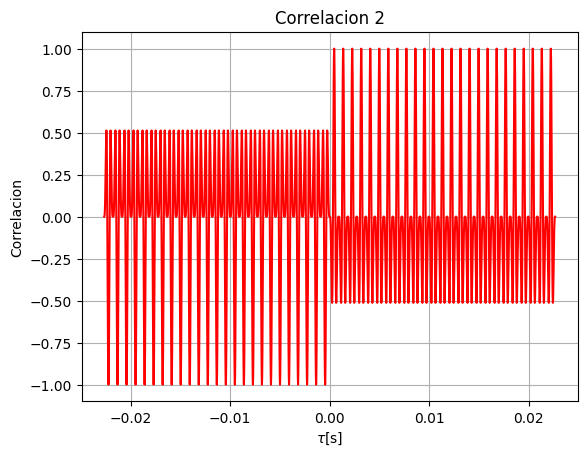

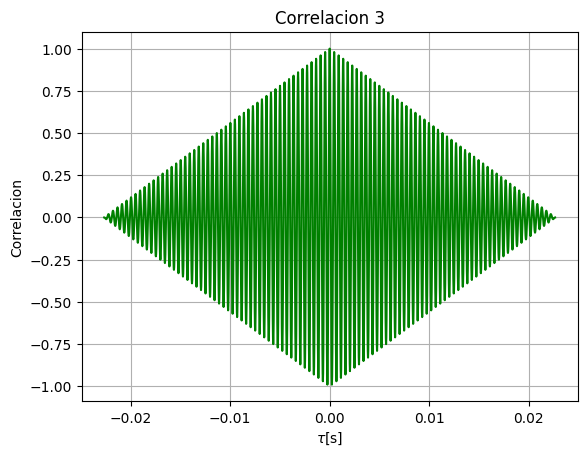

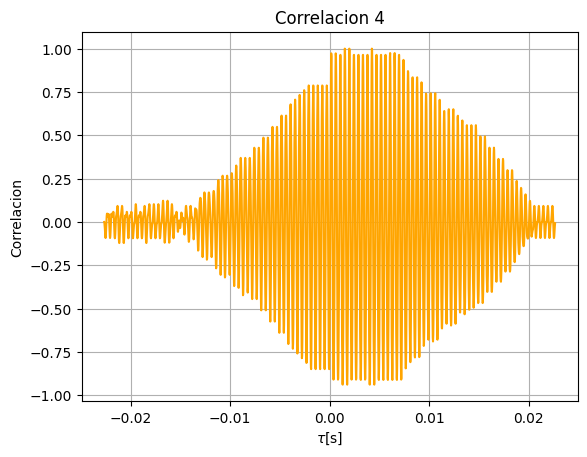

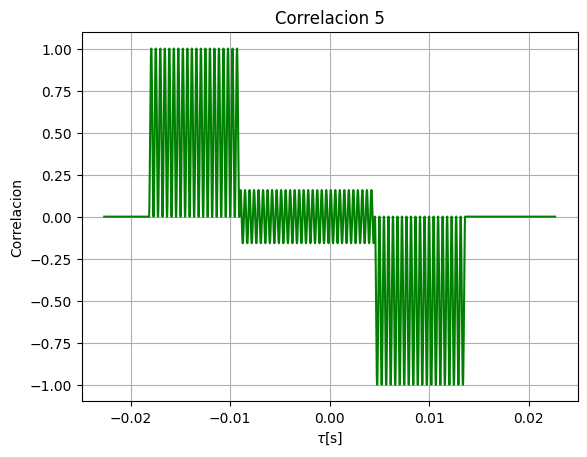

In [9]:
#Autocorrelacion
rxx = np.correlate(x, x, mode='full')  # 'full' para todos los puntos, correlacion entre la señal senoidal de 2kHz y ella misma
lags = np.arange(-len(x)+1, len(x)) * (1/fs)  # para graficar con la demora 

nrxx = rxx / np.max(rxx) #normalizada

plt.figure(6)
plt.plot(lags, nrxx)
plt.title('Autocorrelacion de señal senoidal de 2kHz' )
plt.xlabel(r'$\tau$[s]')
plt.ylabel('Autocorrelacion')
plt.grid(which='both', axis='both')
plt.show()

#Correlacion
rxx1 = np.correlate(x, x1, mode='full')  # 'full' para todos los puntos, correlacion entre la señal senoidal de 2kHz y la señal amplificada 

nrxx1 = rxx1 / np.max(rxx1) #normalizada

plt.figure(7)
plt.plot(lags, nrxx1)
plt.title('Correlacion 1' ) #correlacion entre la señal senoidal de 2kHz y su amplificada con desfase
plt.xlabel(r'$\tau$[s]')
plt.ylabel('Correlacion')
plt.grid(which='both', axis='both')
plt.show()

rxx3 = np.correlate(x, x3, mode='full')  # 'full' para todos los puntos, correlacion entre la señal senoidal de 2kHz y la modulada 

nrxx3 = rxx3 / np.max(rxx3) #normalizada

plt.figure(8)
plt.plot(lags, nrxx3, color='red')
plt.title('Correlacion 2' ) #correlacion entre la señal senoidal de 2kHz y la modulada en amplitud
plt.xlabel(r'$\tau$[s]')
plt.ylabel('Correlacion')
plt.grid(which='both', axis='both')
plt.show()

rxx4 = np.correlate(x, x4, mode='full')  # 'full' para todos los puntos, correlacion entre la señal senoidal de 2kHz y ella misma 

nrxx4 = rxx4 / np.max(rxx4) #normalizada

plt.figure(9)
plt.plot(lags, nrxx4, color='green')
plt.title('Correlacion 3' ) #correlacion entre la señal senoidal de 2kHz y la recortada en potencia
plt.xlabel(r'$\tau$[s]')
plt.ylabel('Correlacion')
plt.grid(which='both', axis='both')
plt.show()

rxx5 = np.correlate(x, x5, mode='full')  # 'full' para todos los puntos, correlacion entre la señal senoidal de 2kHz y ella misma 

nrxx5 = rxx5 / np.max(rxx5) #normalizada

plt.figure(10)
plt.plot(lags, nrxx5, color='orange')
plt.title('Correlacion 4' ) #correlacion entre la señal senoidal de 2kHz y la cuadrada de 4kHz
plt.xlabel(r'$\tau$[s]')
plt.ylabel('Correlacion')
plt.grid(which='both', axis='both')
plt.show()

rxx6 = np.correlate(x, x6, mode='full')  # 'full' para todos los puntos, correlacion entre la señal senoidal de 2kHz y ella misma 

nrxx6 = rxx6 / np.max(rxx6) #normalizada

plt.figure(11)
plt.plot(lags, nrxx6, color='green')
plt.title('Correlacion 5' ) #correlacion entre la señal senoidal de 2kHz y el pulso rectangular de 10 ms
plt.xlabel(r'$\tau$[s]')
plt.ylabel('Correlacion')
plt.grid(which='both', axis='both')
plt.show()

Para la autocorrelación, se observa que, a demora nula, la relación es unitaria y, a medida que se va desplazando, esta va disminuyendo simétricamente con respecto al *0* (es decir, comienzan a "parecerse" cada vez menos). Con la correlación entre la senoidal y la amplificada-desfasada (*Correlación 1*), se observa que aún se conserva esa relación simétrica, porque las señales aún guardan suficiente similitud. Incluso, entre la senoidal y la recortada en potencia, sucede lo mismo (*Correlación 3*).

El caso interesante es el de la *Correlación 2*, entre la señal senoidal de *2kHz* y la modulada en amplitud. En esta, se observa que, aunque haya cierta demora, la correlación siempre permanece como unitaria. Aunque, como hay dos frecuencias reinantes, la similitud no es uniforme.

Entre la senoidal y la cuadrada, al trabajar la cuadrada en una frecuencia distinta y por poseer armónicos dispares, serán semejantes en zonas donde estén en una fase cercana. Sin embargo, se puede apreciar que la correlación es más discontinua. 

Por último, entre la senoidal y el pulso rectangular, se puede percibir que solo coinciden en el intervalo de tiempo en el que aparece el pulso. En la parte en que la correlación es positiva, se debe a cuando el pulso se encuentra con la parte positiva de la senoidal y, en la parte negativa de la correlación, el pulso se enfrenta con la parte negativa de la senoidal.

### Demostración de una igualdad trigométrica
\begin{equation}
2sin(α)sin(β) = cos(α-β)-cos(α+β)
\end{equation}
Para esto, se debe recordar:
\begin{equation}
cos(α\pmβ) = cos(α)cos(β)\mp sen(α)sen(β)
\end{equation}
Entonces:
\begin{equation}
cos(α-β) = cos(α)cos(β)+ sen(α)sen(β)
cos(α+β) = cos(α)cos(β)- sen(α)sen(β)
\end{equation}
Si restamos las dos ecuaciones:
\begin{equation}
cos(α-β)- cos(α+β)= (cos(α)cos(β)+ sen(α)sen(β))-(cos(α)cos(β)- sen(α)sen(β))
\end{equation}
De esta manera obtenemos:
\begin{equation}
cos(α-β)-cos(α+β)=2sin(α)sin(β)
\end{equation}
Demostrando así la igualdad.
Sin embargo, también se puede demostrar gráficamente que esta igualdad se cumple para señales senoidales, considerando *α=wt*, a *β=2wt* y una frecuencia de *1Hz*:
\begin{equation}
2sin(2\pi t)sin(4\pi t)=cos(2\pi t)-cos(6\pi t)
\end{equation}

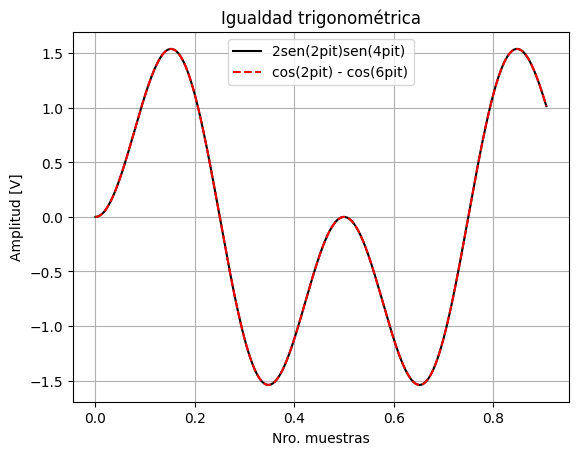

In [6]:
#Creo estas últimas funciones para graficarlas usando un N más alto de 40000 para que se alcance a ver
t7,x7 = mi_funcion_sen(1, 0, 1, 0, 40000, fs) #sen(2pit)
t8,x8 = mi_funcion_sen(1, 0, 2, 0, 40000, fs) #sen(4pit)

x9 = 2*x7*x8 #2sen(2pit)sen(4pit)

t10,x10 = mi_funcion_sen(1, 0, 1, np.pi/2, 40000, fs) #cos(2pit)
t11,x11 = mi_funcion_sen(1, 0, 3, np.pi/2, 40000, fs) #cos(6pit)

x12 = x10 - x11 #cos(2pit) - cos(6pit)

plt.figure(12)
plt.plot(t7, x9, label ='2sen(2pit)sen(4pit)', color='black') #2sen(2pit)sen(4pit)
plt.plot(t11, x12, label ='cos(2pit) - cos(6pit)', color='red', linestyle='--') #cos(2pit) - cos(6pit) linea punteada
plt.title('Igualdad trigonométrica' )
plt.xlabel('Nro. muestras')
plt.ylabel('Amplitud [V]')
plt.grid(which='both', axis='both')
#plt.xlim(0, 0.002)
plt.legend()  # <--- Esto muestra los labels en la figura
plt.show()

Como se puede apreciar, ambas graficas coinciden. La línea negra es de *2sen(2$\pi$t)sen(4$\pi$t)* y la línea roja punteada de *cos(2$\pi$t)-cos(6$\pi$t)* (que como es igual a la anterior, hace parecer que la línea negra también es punteada.

# Conclusiones
- Cuando se modula una señal en amplitud, al tener una señal y otra del doble de la frecuencia (más rápida), se observa como si se tuviera una señal "dentro" de la otra. Ambas señales suben y bajan en grupo, existiendo dos crestas y dos valles en los máximos. Además, la señal modulada tiene una amplitud un tanto menor que las señales senoidales por separado.
- La mayoría de las señales arrojaron ortogonalidad con la señal senoidal principal (al encontrarse en cuadratura en un número entero de períodos), excepto por la señal recortada en amplitud (ya que generó un tipo de onda distinto).
- En cuanto a las correlaciones, se pudo apreciar que daba unitaria para la demora *0* y, a medida que esta última aumentaba, la correlación se iba disminuyendo. Se obtuvo que, aunque se varie la amplitud (incluso al recortarla) de una misma señal senoidal, la correlación se acerca bastante a la autocorrelación. Sin embargo, al trabajar en frecuencias distintas, la relación puede ser más diferente. Además, se debe tener en cuenta el tiempo en el que se presenta cada señal (como es el caso del pulso).
- Por último, en el caso de la demostración de la igualdad trigométrica, fue fundamental llegar al hecho de poder apreciar esta relación fácilmente en un gráfico. Es decir, se pudo contemplar cómo ambos tipo de funciones son equivalentes (no solo en lo analítico).

# Bonus

Energía total canal izquierdo:  5114.737566979145
Energía total canal derecho:  4798.009884235269


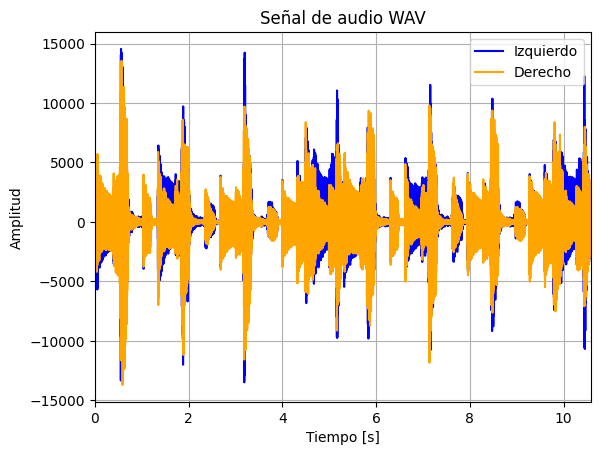

In [5]:
from scipy.io import wavfile 

fs, data = wavfile.read('acoustic-guitar-loop.wav') #como es estéreo, tendrá dos canales, izquierda y derecha

w = np.linspace(0, len(data)/fs, num=len(data))

data_norm = data / np.max(np.abs(data)) #normalizo la data para que sea comparable (acoto entre 1 y -1)
energia_izq = np.sum(data_norm[:, 0]**2)
energia_der = np.sum(data_norm[:, 1]**2)

print("Energía total canal izquierdo: ", energia_izq)
print("Energía total canal derecho: ", energia_der)

# Graficar la señal
plt.figure(13)
plt.plot(w, data[:, 0], label='Izquierdo', color='blue')
plt.plot(w, data[:, 1], label='Derecho', color='orange')
plt.title('Señal de audio WAV')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.xlim(0, w[-1])  # limitar el eje x a la duración total
plt.legend()
plt.show()


La energía mide la "fuerza" que tiene una señal. Se puede observar que la energía de ambos canales difieren, confirmando que hay información estéreo. La del canal izquierdo (azul) es relativamente más alta (aproximadamente un 10%). Eso significa que ese canal contiene sonido que se escucha más fuerte.

### Cuestiones a tener en cuenta
- Se me hizo un poco cuesta arriba el trabajo, estuve varios días para poder culminarlo y, aún así, no me siento conforme con lo realizado. Igualmente, entiendo que es el primero y me iré adaptando.
- Hay algunos puntos en los que no me siento seguro de haberlos realizado bien. Tuve que buscar bastantes conceptos y, sobre todo, información del lenguaje de programación para obtener ideas. 
- Por eso, las conclusiones sé que no son las mejores, ya que me costó poder encontrar patrones para poder escribirlas, quizás por no tener algunos conceptos tan afianzados y por temor a manifestar algo erróneo. Al no estar tan seguro con algunos resultados, no quería inferir cuestiones desacertadas (me limité más a presentar los datos esta vez).
- Quedo a la espera de las correcciones para seguir mejorándolo. También, hice el TS0 del campus.